In [1]:
#import data
import torch as t
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = tv.datasets.CIFAR10(
    root = 'F:\\pyTorch\\datasets',
    train = True,
    download = True,
    transform = transform
)

trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size =4,
    shuffle = True,
    num_workers = 0
)

testset = tv.datasets.CIFAR10(
    "F:\\pyTorch\\datasets",
    train = False,
    download = True,
    transform = transform
)

testloader = t.utils.data.DataLoader(
    testset,
    batch_size = 4,
    shuffle = False,
    num_workers =0
)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


car


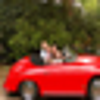

In [2]:
(data, label) = trainset[99]
print(classes[label])

show(data).resize((100,100))
show((data+1) / 2 ).resize((100,100))

       frog       plane       horse        ship


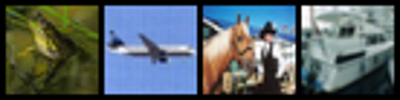

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [5]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
from torch import optim
loss_method = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001, momentum =0.9)

In [11]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = loss_method(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.data
        
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch+1,i+1, running_loss/2000))
            running_loss = 0.0

[1,  2000] loss: 1.595
[1,  4000] loss: 1.512
[1,  6000] loss: 1.482
[1,  8000] loss: 1.428
[1, 10000] loss: 1.419
[1, 12000] loss: 1.359
[2,  2000] loss: 1.309
[2,  4000] loss: 1.293
[2,  6000] loss: 1.290
[2,  8000] loss: 1.263
[2, 10000] loss: 1.251
[2, 12000] loss: 1.213


使用crossentropy的官方范例：

loss0 = nn.CrossEntropyLoss()
input = t.randn(4, 10, requires_grad=True)
print(input.shape)
target = t.empty(4, dtype=t.long).random_(5)
print(target)
output = loss0(input, target)
output.backward()
print(output)
print(output.data)